In [1]:
%matplotlib notebook
import numpy as np
import helpers
import pandas as pd

# ADVI

In [2]:
# load container for plotting
evoked = helpers.load_evoked_container()

# load 'posterior p-values'
pvals = pd.read_hdf(helpers.resultsdir + '/meg_hierarchical_advi.h5', 'pvals') 

Reading data/meg_final_data/evoked_hfreq10.0_sfreq100.0_window0.40-0.70_mag-ave.fif ...
    Read a total of 6 projection items:
        grad_ssp_upright2.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright2.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright2.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright2.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright2.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright2.fif : PCA-v3 (1 x 306)  idle
    Found the data of interest:
        t =     400.00 ...     700.00 ms (Unknown)
        0 CTF compensation matrices available
        nave = 480 - aspect type = 100
No baseline correction applied


<IPython.core.display.Javascript object>


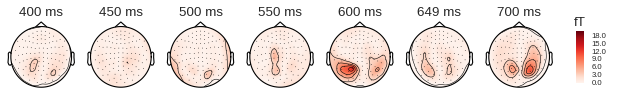

<IPython.core.display.Javascript object>


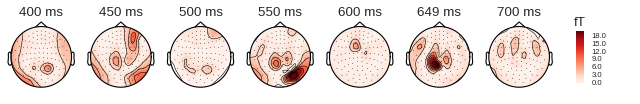

<IPython.core.display.Javascript object>


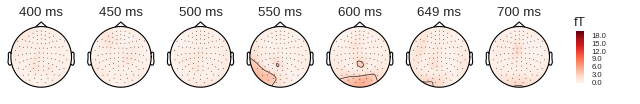

<IPython.core.display.Javascript object>


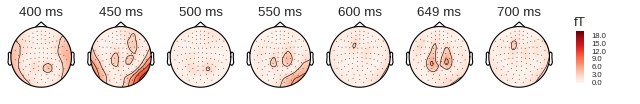

<IPython.core.display.Javascript object>


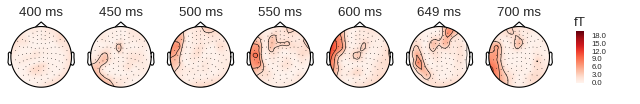

<IPython.core.display.Javascript object>


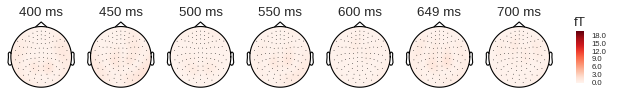

In [3]:
times = np.arange(0.4, 0.71, 0.05)
for reg in pvals.columns:
    evoked.data = -np.log10(pvals[reg].values.reshape(evoked.data.shape))
    evoked.comment = reg
    
    fig = evoked.plot_topomap(times, scale=1, vmin=0, vmax=20, cmap=('Reds', False))
    fig.set_label(reg)

# Summary statistic approach

In [4]:
second_level = pd.read_hdf(helpers.resultsdir + '/meg_hierarchical_ss.h5', 'second_level')

<IPython.core.display.Javascript object>


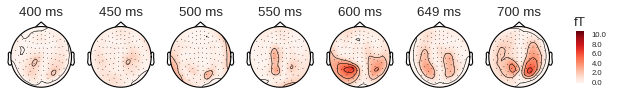

<IPython.core.display.Javascript object>


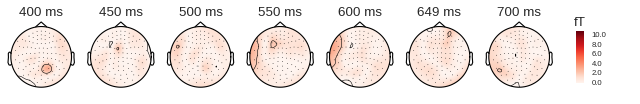

<IPython.core.display.Javascript object>


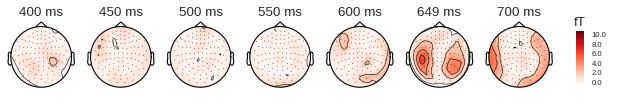

<IPython.core.display.Javascript object>


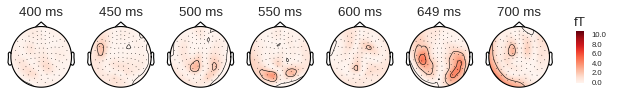

<IPython.core.display.Javascript object>


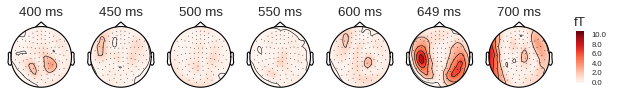

<IPython.core.display.Javascript object>


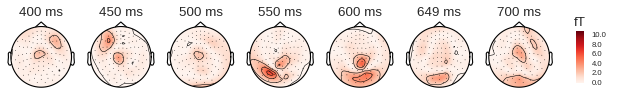

In [12]:
for reg in pvals.columns:
    evoked.data = -np.log10(second_level.loc(axis=1)[('mlog10p', reg)].values.reshape(evoked.data.shape))
    evoked.comment = reg
    
    fig = evoked.plot_topomap(times, scale=1, vmin=0, vmax=11, cmap=('Reds', False))
    fig.set_label(reg)

In [11]:
(-np.log10(second_level.loc(axis=1)[('mlog10p', slice(None))])).describe()

measure        mlog10p                                                      \
regressor        dot_y      entropy    intercept logpost_left     surprise   
count      3162.000000  3162.000000  3162.000000  3162.000000  3162.000000   
mean          0.868607     0.706865     1.102325     0.884910     0.601909   
std           0.947086     0.784326     1.284786     0.987564     0.568125   
min           0.000391     0.000189     0.000251     0.000194     0.000254   
25%           0.225629     0.173989     0.249061     0.215717     0.182509   
50%           0.559982     0.421974     0.642460     0.545998     0.438862   
75%           1.161562     0.947719     1.460564     1.196839     0.849645   
max           6.745742     5.363535     8.703274     8.573442     3.750109   

measure                 
regressor   trial_time  
count      3162.000000  
mean          0.880851  
std           1.131410  
min           0.000085  
25%           0.175727  
50%           0.482228  
75%           1.137657  
max          10.888429

## Too fast trials and trials with too few simulations properly excluded
(after bugfix in posterior_model_measures.py)

In [14]:
second_level = pd.read_hdf(helpers.resultsdir + '/meg_hierarchical_ss.h5', 'second_level')
second_level.loc(axis=1)[('mlog10p', slice(None))].describe()

measure        mlog10p                                                      \
regressor        dot_y      entropy    intercept logpost_left     surprise   
count      3162.000000  3162.000000  3162.000000  3162.000000  3162.000000   
mean          0.890638     0.719266     1.137986     0.878519     0.589539   
std           0.964177     0.790991     1.293683     0.968680     0.556023   
min           0.000522     0.000123     0.000281     0.000135     0.000399   
25%           0.222144     0.176434     0.252516     0.221898     0.174901   
50%           0.564182     0.430729     0.678801     0.541096     0.419708   
75%           1.211604     0.982718     1.505301     1.193168     0.840543   
max           6.503528     5.491009     8.719796     8.730784     3.532959   

measure                 
regressor   trial_time  
count      3162.000000  
mean          0.882555  
std           1.078765  
min           0.000048  
25%           0.184589  
50%           0.495245  
75%           1.137264  
max           9.430836

<IPython.core.display.Javascript object>


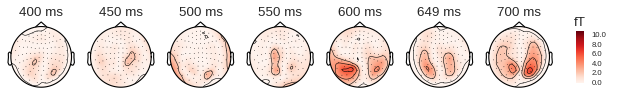

<IPython.core.display.Javascript object>


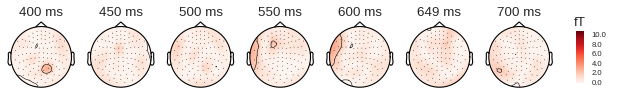

<IPython.core.display.Javascript object>


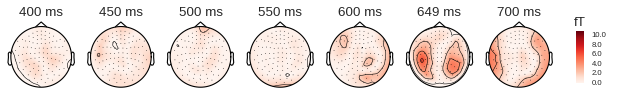

<IPython.core.display.Javascript object>


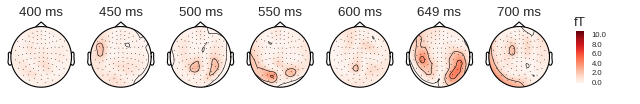

<IPython.core.display.Javascript object>


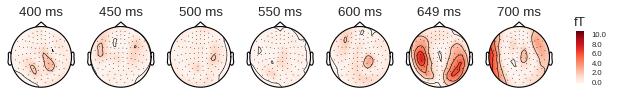

<IPython.core.display.Javascript object>


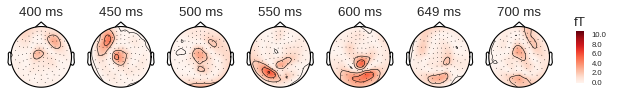

In [16]:
for reg in pvals.columns:
    evoked.data = second_level.loc(axis=1)[('mlog10p', reg)].values.reshape(evoked.data.shape)
    evoked.comment = reg
    
    fig = evoked.plot_topomap(times, scale=1, vmin=0, vmax=11, cmap=('Reds', False))
    fig.set_label(reg)